# 📊 Step 1: Dataset Exploration
Before building anything, we need to UNDERSTAND our data.

**Goals of this notebook:**
1. Load and inspect the metadata CSV
2. Understand category distributions
3. Visualize sample images
4. Check image sizes and quality
5. Handle missing data
6. Save a clean version of the dataset

In [2]:
# === Cell 1: Imports ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from pathlib import Path
from collections import Counter
import os

# Set paths
DATA_DIR = Path("../data/raw")
IMAGE_DIR = DATA_DIR / "images"

print(f"Data directory: {DATA_DIR}")
print(f"Image directory: {IMAGE_DIR}")
print(f"Total image files: {len(list(IMAGE_DIR.glob('*.jpg')))}")

Data directory: ../data/raw
Image directory: ../data/raw/images
Total image files: 44441


In [3]:
# === Cell 2: Load the metadata CSV ===
# on_bad_lines='skip' handles any malformed rows
df = pd.read_csv(DATA_DIR / "styles.csv", on_bad_lines='skip')

print(f"Shape: {df.shape}")
print(f"\nColumns: {df.columns.tolist()}")
print(f"\nData types:\n{df.dtypes}")
df.head(10)

Shape: (44424, 10)

Columns: ['id', 'gender', 'masterCategory', 'subCategory', 'articleType', 'baseColour', 'season', 'year', 'usage', 'productDisplayName']

Data types:
id                      int64
gender                 object
masterCategory         object
subCategory            object
articleType            object
baseColour             object
season                 object
year                  float64
usage                  object
productDisplayName     object
dtype: object


,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt
5,1855,Men,Apparel,Topwear,Tshirts,Grey,Summer,2011.0,Casual,Inkfruit Mens Chain Reaction T-shirt
6,30805,Men,Apparel,Topwear,Shirts,Green,Summer,2012.0,Ethnic,Fabindia Men Striped Green Shirt
7,26960,Women,Apparel,Topwear,Shirts,Purple,Summer,2012.0,Casual,Jealous 21 Women Purple Shirt
8,29114,Men,Accessories,Socks,Socks,Navy Blue,Summer,2012.0,Casual,Puma Men Pack of 3 Socks
9,30039,Men,Accessories,Watches,Watches,Black,Winter,2016.0,Casual,Skagen Men Black Watch


In [4]:
# === Cell 3: Check for missing values ===
print("Missing values per column:")
print(df.isnull().sum())
print(f"\nTotal rows with any missing value: {df.isnull().any(axis=1).sum()}")

Missing values per column:
id                      0
gender                  0
masterCategory          0
subCategory             0
articleType             0
baseColour             15
season                 21
year                    1
usage                 317
productDisplayName      7
dtype: int64

Total rows with any missing value: 347


In [5]:
# === Cell 4: Check which images actually exist on disk ===
# Some IDs in CSV might not have corresponding image files
image_files = set(os.listdir(IMAGE_DIR))
df['image_exists'] = df['id'].apply(lambda x: f"{x}.jpg" in image_files)

print(f"Total rows in CSV: {len(df)}")
print(f"Images that exist: {df['image_exists'].sum()}")
print(f"Missing images: {(~df['image_exists']).sum()}")

# Keep only rows where image exists
df = df[df['image_exists']].reset_index(drop=True)
print(f"\nClean dataset size: {len(df)}")

Total rows in CSV: 44424
Images that exist: 44419
Missing images: 5

Clean dataset size: 44419


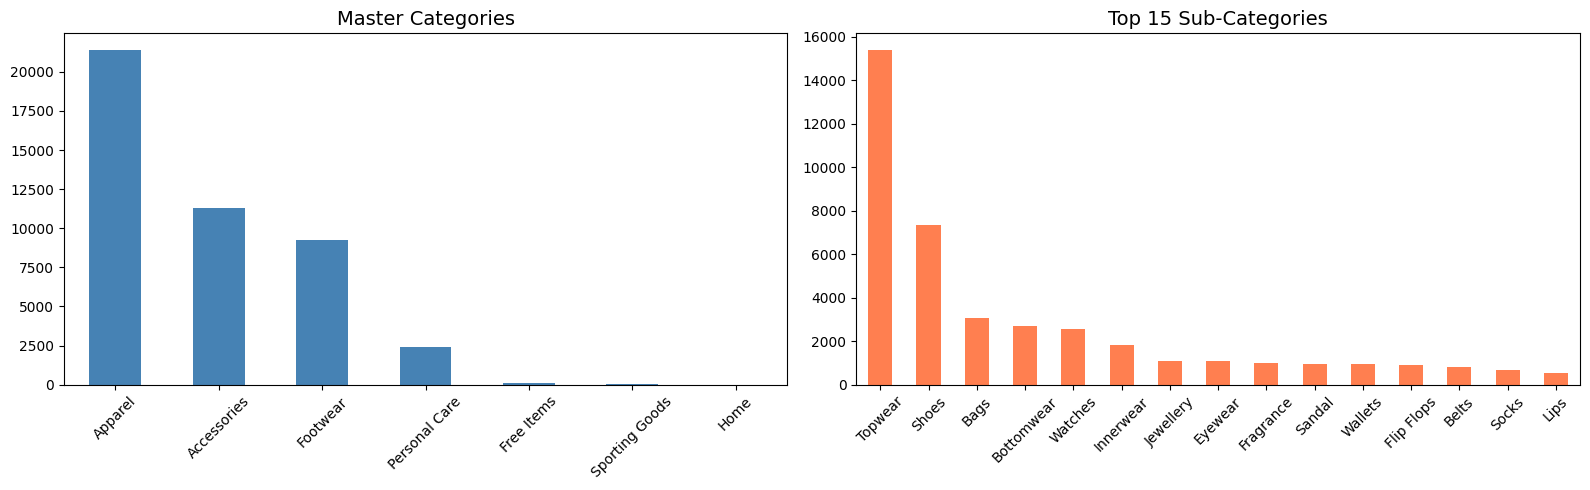


Master Category counts:
masterCategory
Apparel           21392
Accessories       11274
Footwear           9219
Personal Care      2403
Free Items          105
Sporting Goods       25
Home                  1
Name: count, dtype: int64


In [6]:
# === Cell 5: Category Distribution ===
# This tells us what kinds of products we're working with

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Master categories (broad)
df['masterCategory'].value_counts().plot(kind='bar', ax=axes[0], color='steelblue')
axes[0].set_title('Master Categories', fontsize=14)
axes[0].set_xlabel('')
axes[0].tick_params(axis='x', rotation=45)

# Sub categories (top 15)
df['subCategory'].value_counts().head(15).plot(kind='bar', ax=axes[1], color='coral')
axes[1].set_title('Top 15 Sub-Categories', fontsize=14)
axes[1].set_xlabel('')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("\nMaster Category counts:")
print(df['masterCategory'].value_counts())

Total unique article types: 142

Top 20 article types:
articleType
Tshirts                  7066
Shirts                   3215
Casual Shoes             2845
Watches                  2542
Sports Shoes             2036
Kurtas                   1844
Tops                     1762
Handbags                 1759
Heels                    1323
Sunglasses               1073
Wallets                   936
Flip Flops                914
Sandals                   897
Briefs                    849
Belts                     813
Backpacks                 724
Socks                     686
Formal Shoes              637
Perfume and Body Mist     613
Jeans                     608
Name: count, dtype: int64


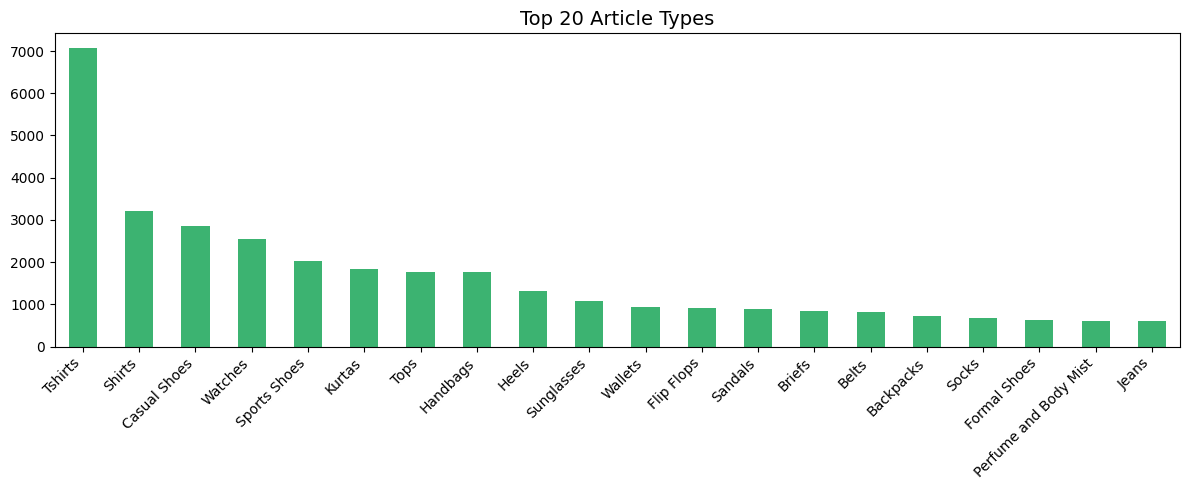

In [7]:
# === Cell 6: Article Type Distribution (most specific category) ===
# This is what we'll use for EVALUATION later

print(f"Total unique article types: {df['articleType'].nunique()}")
print(f"\nTop 20 article types:")
print(df['articleType'].value_counts().head(20))

# Visualize top 20
plt.figure(figsize=(12, 5))
df['articleType'].value_counts().head(20).plot(kind='bar', color='mediumseagreen')
plt.title('Top 20 Article Types', fontsize=14)
plt.xlabel('')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

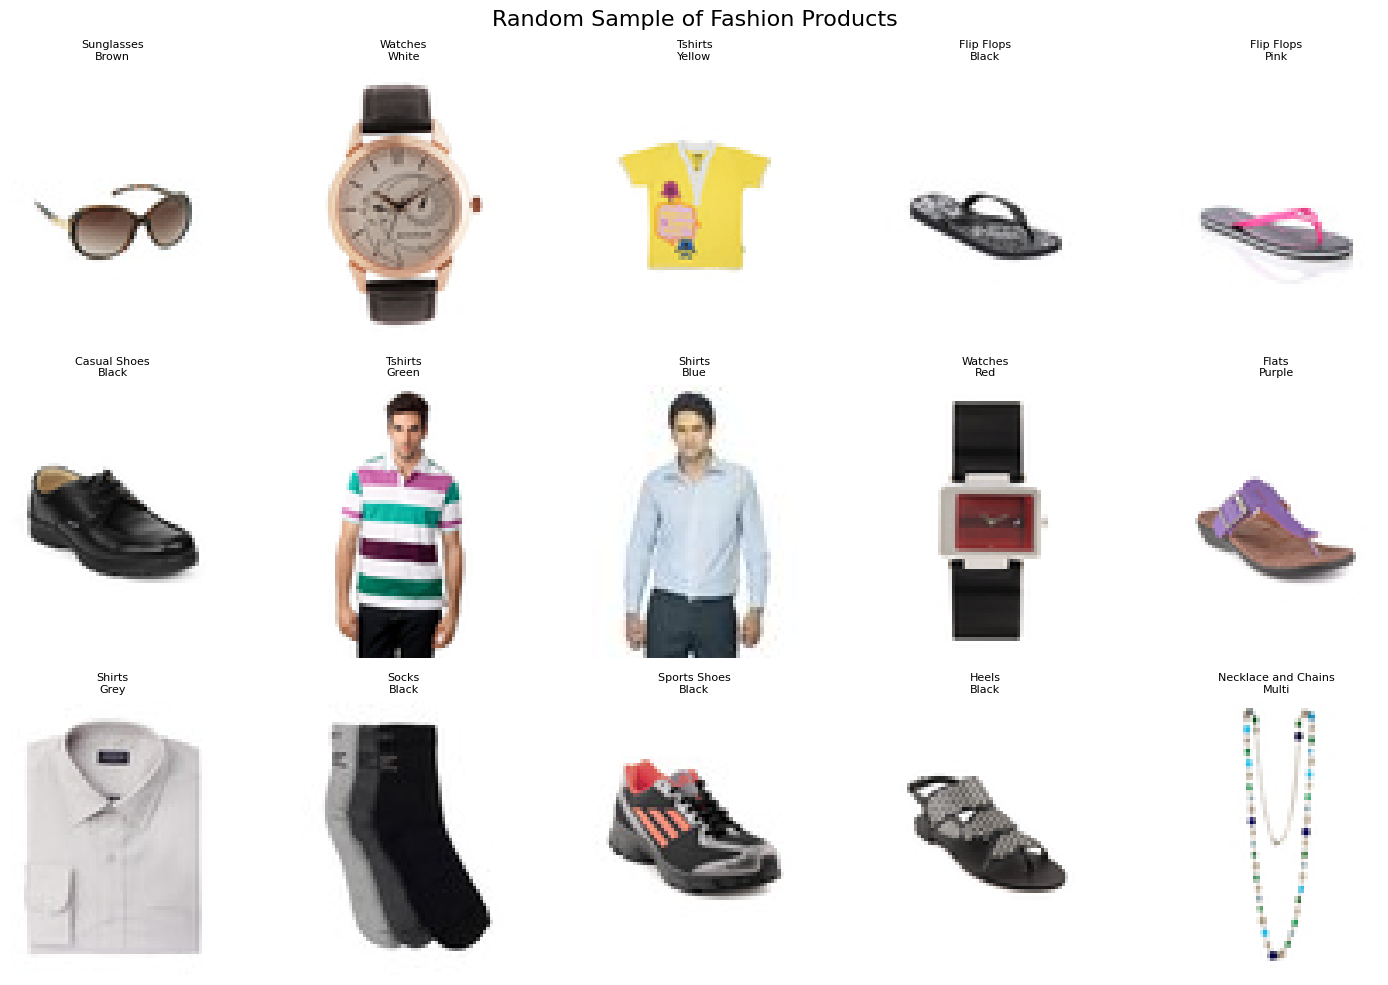

In [8]:
# === Cell 7: Visualize Sample Images ===
# Let's SEE what we're working with

fig, axes = plt.subplots(3, 5, figsize=(15, 10))

# Pick 15 random images
samples = df.sample(15, random_state=42)

for i, (ax, (_, row)) in enumerate(zip(axes.flat, samples.iterrows())):
    img_path = IMAGE_DIR / f"{row['id']}.jpg"
    img = Image.open(img_path)
    ax.imshow(img)
    ax.set_title(f"{row['articleType']}\n{row['baseColour']}", fontsize=8)
    ax.axis('off')

plt.suptitle('Random Sample of Fashion Products', fontsize=16)
plt.tight_layout()
plt.show()

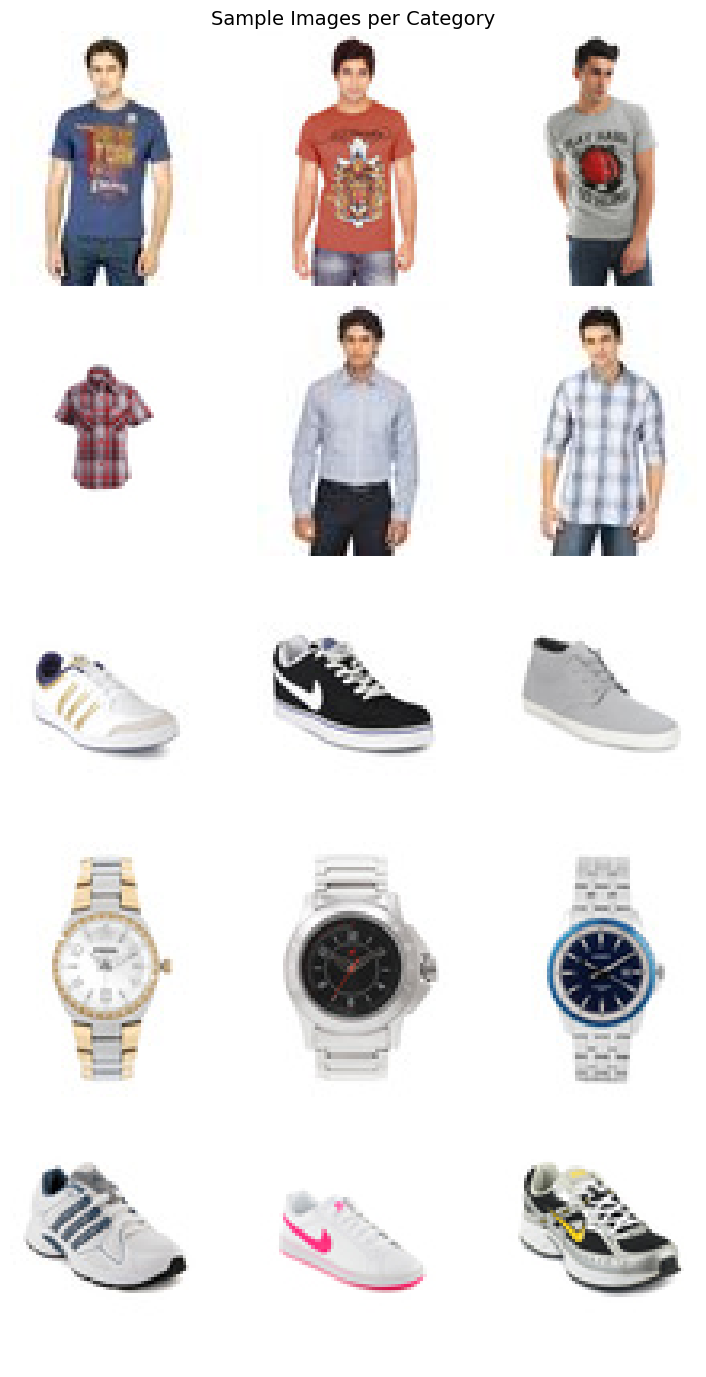

In [11]:
# === Cell 8: Visualize by Category ===
# Show 3 images from each of the top 5 article types

top_5_types = df['articleType'].value_counts().head(5).index.tolist()

fig, axes = plt.subplots(5, 3, figsize=(8, 14))

for row_idx, article_type in enumerate(top_5_types):
    type_df = df[df['articleType'] == article_type].sample(3, random_state=42)
    for col_idx, (_, item) in enumerate(type_df.iterrows()):
        img = Image.open(IMAGE_DIR / f"{item['id']}.jpg")
        axes[row_idx][col_idx].imshow(img)
        axes[row_idx][col_idx].axis('off')

plt.suptitle('Sample Images per Category', fontsize=14)
plt.tight_layout()
plt.show()

In [12]:
# === Cell 9: Check Image Sizes ===
# Important: CNN expects fixed input size (224x224)
# We need to know the original sizes to plan preprocessing

sample_paths = [IMAGE_DIR / f"{id}.jpg" for id in df['id'].sample(200, random_state=42)]
sizes = [Image.open(p).size for p in sample_paths]  # (width, height)

widths = [s[0] for s in sizes]
heights = [s[1] for s in sizes]

print(f"Width  — min: {min(widths)}, max: {max(widths)}, mean: {np.mean(widths):.0f}")
print(f"Height — min: {min(heights)}, max: {max(heights)}, mean: {np.mean(heights):.0f}")
print(f"Unique sizes: {len(set(sizes))}")
print(f"Most common: {Counter(sizes).most_common(3)}")

Width  — min: 54, max: 60, mean: 60
Height — min: 80, max: 80, mean: 80
Unique sizes: 2
Most common: [((60, 80), 199), ((54, 80), 1)]


Unique colors: 46

Top 10 colors:
baseColour
Black        9727
White        5538
Blue         4917
Brown        3494
Grey         2741
Red          2453
Green        2115
Pink         1860
Navy Blue    1789
Purple       1640
Name: count, dtype: int64


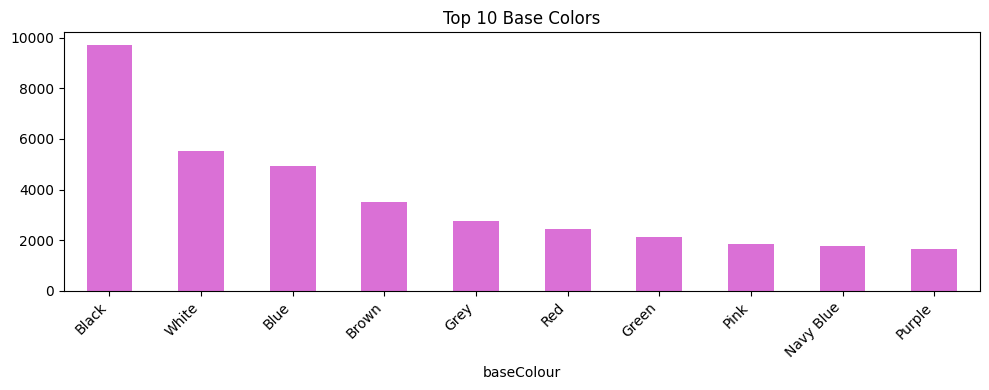

In [13]:
# === Cell 10: Color Distribution ===
print(f"Unique colors: {df['baseColour'].nunique()}")
print(f"\nTop 10 colors:")
print(df['baseColour'].value_counts().head(10))

plt.figure(figsize=(10, 4))
df['baseColour'].value_counts().head(10).plot(kind='bar', color='orchid')
plt.title('Top 10 Base Colors')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [14]:
# === Cell 11: Save Clean Dataset ===
# Drop rows with missing images, save for next steps

clean_df = df.drop(columns=['image_exists'])
clean_df.to_csv("../data/processed/clean_styles.csv", index=False)
print(f"Saved clean dataset: {len(clean_df)} rows")
print(f"Columns: {clean_df.columns.tolist()}")

Saved clean dataset: 44419 rows
Columns: ['id', 'gender', 'masterCategory', 'subCategory', 'articleType', 'baseColour', 'season', 'year', 'usage', 'productDisplayName']


In [15]:
# === Cell 12: Summary Stats for README ===
print("=" * 50)
print("DATASET SUMMARY")
print("=" * 50)
print(f"Total images:          {len(clean_df)}")
print(f"Master categories:     {clean_df['masterCategory'].nunique()}")
print(f"Sub categories:        {clean_df['subCategory'].nunique()}")
print(f"Article types:         {clean_df['articleType'].nunique()}")
print(f"Colors:                {clean_df['baseColour'].nunique()}")
print(f"Image size:            {sizes[0]}")
print("=" * 50)

DATASET SUMMARY
Total images:          44419
Master categories:     7
Sub categories:        45
Article types:         142
Colors:                46
Image size:            (60, 80)
